# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports and model class](#toc1_)
- 2. [Question 1: Illustrate in Edgeworth box](#toc2_)    
- 3. [Question 2: Calculate the error in the market clearing condition s](#toc3_)
- 4. [Question 3: What is the market clearing price?](#toc4_)
- 5. [Question 4a: Find the allocation if only prices in P1 can be chosen](#toc5_)
- 6. [Question 4b: Find the allocation if any positive price can be chosen](#toc6_)
- 7. [Question 5a: Find the allocation if the choice set is restricted to C](#toc7_)
- 8. [Question 5b: Find the allocation if no further restrictions are imposed](#toc8_)
- 9. [Question 6a: Find the resulting allocation](#toc9_)
- 10. [Question 6b: Illustrate and compare our results in question 3-5, and discuss pros and cons of the various allocations](#toc10_)
- 11. [Question 7: Draw a set W with 50 elements](#toc11_)
- 12. [Question 8: Find the market equilibrium allocation for each w^A belonging to C and plot them in the Edgeworth box](#toc12_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc1_)

In [90]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
#Model class recieved from Jeppe Druedahl
from ExchangeEconomy import ExchangeEconomyClass

Imports and set magics:

In [92]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Question 1: Illustrate in Edgeworth box](#toc2_)

We start by illustrating the given exchange economy between consumer A and B with an Edgeworth Box.

**Explain how you solve the model**

In [93]:
model = ExchangeEconomyClass()

Pareto improvement: (xA1 = 0.08 , xA2 = 0.9600000000000001 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.88 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.8933333333333334 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9066666666666667 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.92 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9333333333333333 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9466666666666668 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9600000000000001 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8266666666666668 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8400000000000001 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8533333333333334 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8666666666666667 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.88 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.893333333333

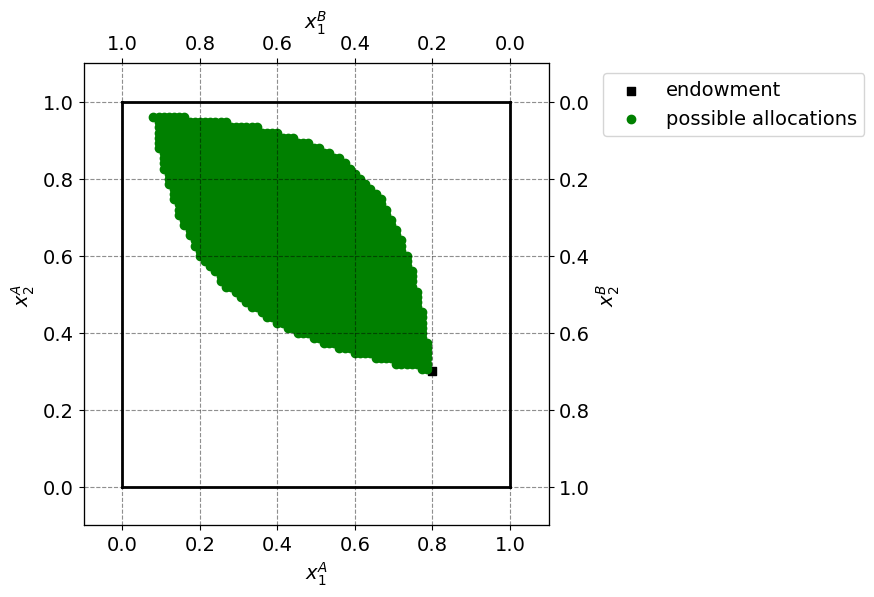

In [94]:
#We create our Edgeworth Box

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

N = 75
x_grid = np.arange(0, 1, 1/N)
#x_grid = np.linspace(0, 1, N+1) #Man kan lave begge.

p_imp_good1 = [] #An empty list for the pareto improvment for good 1. These lists will store the x-coordinates and y-coordinates respectively of Pareto improvements found during the loop.
p_imp_good2 = [] 

#Finding the utility with the given endowments

u_A_in = model.utility_A(par.w1A, par.w2A)
u_B_in = model.utility_B(1-par.w1A, 1-par.w2A)

for x1A in x_grid:
    for x2A in x_grid: 
        ua = model.utility_A(x1A, x2A)
        ub = model.utility_B(1-x1A, 1-x2A)
        if ua >= u_A_in and ub >= u_B_in:
            p_imp_good1.append(x1A)
            p_imp_good2.append(x2A)
            print("Pareto improvement: (xA1 =", x1A, ", xA2 =", x2A, ")") #This line gives us all the actually combinations of x1A and x2A that are pareto improvements from the initial endowments.



# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(p_imp_good1,p_imp_good2,marker='o',color='green',label='possible allocations')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.7,1.0));




In [95]:
#The interpretation of our results are as follows: 
# For example with the first combination where x1A = 0,08 and x2A = 0,96 we have a pareto improvement relative to the initial endowment.
# Each combination listed satisfies the condition that both agents are at least as well off as they were with their initial endowment. These combinations can be considered as potential allocations in a Pareto efficient allocation.


## 3. <a id='toc3_'></a>[Question 2: Calculate the error in the market clearing condition s](#toc3_)

Explain your code and procedure

p1 = 0.5, error1 = 0.533333333333333, error2 = -0.2666666666666666
p1 = 0.5266666666666666, error1 = 0.47594936708860747, error2 = -0.25066666666666654
p1 = 0.5533333333333333, error1 = 0.42409638554216866, error2 = -0.23466666666666652
p1 = 0.58, error1 = 0.3770114942528735, error2 = -0.2186666666666665
p1 = 0.6066666666666667, error1 = 0.334065934065934, error2 = -0.2026666666666665
p1 = 0.6333333333333333, error1 = 0.29473684210526296, error2 = -0.18666666666666654
p1 = 0.66, error1 = 0.2585858585858585, error2 = -0.1706666666666664
p1 = 0.6866666666666666, error1 = 0.22524271844660176, error2 = -0.1546666666666665
p1 = 0.7133333333333334, error1 = 0.19439252336448576, error2 = -0.1386666666666665
p1 = 0.74, error1 = 0.16576576576576557, error2 = -0.12266666666666659
p1 = 0.7666666666666666, error1 = 0.13913043478260867, error2 = -0.10666666666666658
p1 = 0.7933333333333333, error1 = 0.11428571428571416, error2 = -0.09066666666666645
p1 = 0.8200000000000001, error1 = 0.0910569105691

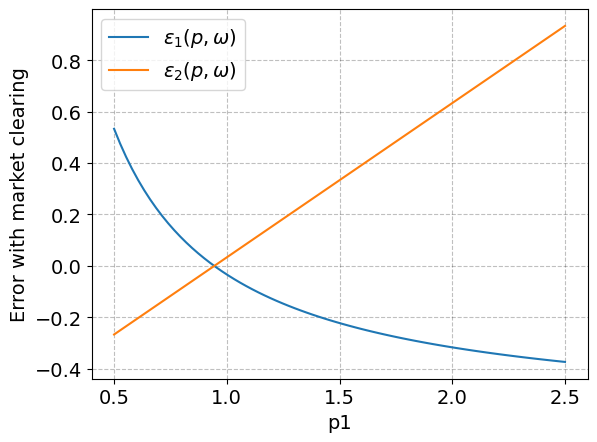

In [97]:
# Create an instance of the ExchangeEconomyClass
model2 = ExchangeEconomyClass()

N = 75

# Creating a list of p1 values using list comprehension
p1 = [0.5+2*t/N for t in range(N+1)]

# Calculating the excess demand for each p1 using list comprehension
epsilon = [model2.check_market_clearing(t) for t in p1]

# Extracting error term 1 and error term 2 from the e:
error1 = [error[0] for error in epsilon]
error2 = [error[1] for error in epsilon]

#We now create a loop where we iterate over each value of p1 and for each p1 value in the given interval we print its corresponding values of error1 and error2.
for i in range(len(p1)):
    print(f"p1 = {p1[i]}, error1 = {error1[i]}, error2 = {error2[i]}")
#Vi bør nok printe uden for loopet, og store the best error1 and error2 altså hvor de er tættest muligt på 0.

# Plotting error1 and error2
plt.plot(p1, error1, label='$\epsilon_1(p,\omega)$')
plt.plot(p1, error2, label='$\epsilon_2(p,\omega)$')

# Adding labels and legend
plt.xlabel('p1')
plt.ylabel('Error with market clearing')
plt.legend()

# Showing the plot
plt.show()


## 4. <a id='toc4_'></a>[Question 3: What is the market clearing price?](#toc4_)

Explain your code and procedure

In [98]:
# Initializing variables to track minimum absolute errors and corresponding p1 values
min_abs_error1 = float('inf')
min_abs_error2 = float('inf')
p1_min_abs_error1 = None #Initial guess is set to none
p1_min_abs_error2 = None

# Iterating over each value of p1
for i in p1:
    # Calculating errors for the current value of p1
    error1, error2 = model2.check_market_clearing(i)
    
    # Updating minimum absolute errors and corresponding p1 values if smaller absolute errors are found
    if abs(error1) < min_abs_error1:
        min_abs_error1 = abs(error1)
        p1_min_abs_error1 = i #It means that for the p1 value where error1 is less than the min_abs_error1 is called p1_min_abs_error1
    if abs(error2) < min_abs_error2:
        min_abs_error2 = abs(error2)
        p1_min_abs_error2 = i

# Printing the p1 values where error1 and error2 are minimized as much as possible
print("p1 value for minimum error1:", p1_min_abs_error1, p1_min_abs_error2)

p1 value for minimum error1: 0.9533333333333334 0.9533333333333334


ADD CONCISE CONLUSION.

## 5. <a id='toc5_'></a>[Question 4a: Find the allocation if only prices in P1 can be chosen](#toc5_)


In [99]:
#The goal is to find a value for x1A and x2A that maximizes A's utility depending on the amount of x1B and x2B.

In [100]:
from scipy import optimize
from scipy.optimize import minimize

In [101]:
#Example of code
model3 = ExchangeEconomyClass()

p1 = [0.5+2*t/N for t in range(N+1)]
#P1 = np.arange(0.5, 2.6, 0.5)
p2 = 1 #Er det nødvendigt?

def utility_A(x1B, x2B, p1, par):
    return (1-x1B)**par.alpha*(1-x2B)**(1-par.alpha)

#We define a function which purpose is to maximize consumer A's utility given the demand for goods by consumer B and p1.
def max_utility_A_given_B(p1, par):
    # Calculating demand for goods by consumer B given p1:
    x1B, x2B = model3.demand_B(p1, p2)
    
    # Calculating utility of consumer A given demand of B and prices p1
    u_A = utility_A(x1B, x2B, p1, par)
    
    # We use negative utility because we are maximizing
    return -u_A

# Initial guess for p1 is the one we found in question 3: 0.9533
p1_initial_guess = 0.9533

# We optimization the utility of consumer A: 
result = minimize(max_utility_A_given_B, p1_initial_guess, args=(model3.par,))

# Extract the optimal p1
optimal_p1 = result.x[0]

# Calculating the demand for goods by consumer B with the optimal p1
x1B_given_optimal_p1, x2B_given_optimal_p1 = model3.demand_B(optimal_p1, p2)

# Calculating the utility of consumer A with the optimal p1 and optimal demand of B
optimal_u_A = utility_A(x1B_given_optimal_p1, x2B_given_optimal_p1, optimal_p1, model3.par)

new_allocation_x1A = 1 - x1B_given_optimal_p1
new_allocation_x2A = 1 - x2B_given_optimal_p1

print("Optimal p1:", optimal_p1)
print("x1B_given_optimal_p1:", x1B_given_optimal_p1)
print("x2B_given_optimal_p1:", x2B_given_optimal_p1)
print("Max utility for consumer A given B's x1B and x2B as well p1:", optimal_u_A)
print("New consumption of good 1 for A is:", new_allocation_x1A)
print("New consumption of good 2 for A is:", new_allocation_x2A)

Optimal p1: 1.8992443517490574
x1B_given_optimal_p1: 0.379045090347065
x2B_given_optimal_p1: 0.3599496234499372
Max utility for consumer A given B's x1B and x2B as well p1: 0.6336208503815268
New consumption of good 1 for A is: 0.620954909652935
New consumption of good 2 for A is: 0.6400503765500628


## 6. <a id='toc6_'></a>[Question 4b: Find the allocation if any positive price can be chosen](#toc6_)

In [104]:
from scipy.optimize import minimize_scalar

# Define the utility function of consumer A, given price p1 and consumer B's endowments.
def utility_A_at_given_prices(p1, w1B, w2B):
    x1B = 1 - model2.demand_B(p1, 1)[0]  # Calculate x1B using consumer B's demand function and setting p2 as numeraire
    x2B = 1 - model2.demand_B(p1, 1)[1]  # Calculate x2B using consumer B's demand function
    if x1B < 0 or x2B < 0:
        return 0
    return model2.utility_A(x1B, x2B)     # Calculate and return utility of A given x1B and x2B

# Define the utility function we want to maximize (minimize with a negative sign)
def maximize_A_utility(p1):
    return -utility_A_at_given_prices(p1, model2.par.w1B, model2.par.w2B) # Here we return Consumer A's utility at p1 and B's endowments

# We are creating a wide range of p1, and therefore allowing for any positive price
p1_values = [0.01 * t for t in range(1, 1001)] #A thousand because we can't get "inf" to work...

# We perform the minization again, but not using bounds this time, because we dont want an upper bound.
result = minimize_scalar(maximize_A_utility, bracket=[0.5, 2.5])

# Again extracting the result to a new variable
optimal_price = result.x

# Calculating the allocations replacing p1 with the optimal price found.
x1B_optimal = 1 - model2.demand_B(optimal_price, 1)[0]
x2B_optimal = 1 - model2.demand_B(optimal_price, 1)[1]

# Printing the results again.
print("Optimal price:", optimal_price)
print("Optimal allocation (x1B, x2B):", (x1B_optimal, x2B_optimal))

Optimal price: 1.8993462971582264
Optimal allocation (x1B, x2B): (0.620968097972329, 0.6400435801894516)


## 7. <a id='toc7_'></a>[Question 5a: Find the allocation if the choice set is restricted to C](#toc7_)

In [ ]:
#We now need to assume that A chooses B’s consumption, but such that B is not worse of than in the initial endowment. A is thus the market maker.
#We understand the question as A will make consumption choices for Consumer B, ensuring that B's utility is not worse than with B's initial endowment.

In [105]:
model = ExchangeEconomyClass()
from scipy.optimize import minimize

N = 75
x_grid = np.arange(0, 1, 1/N)

# This constraint tells us that the utility of consumer A minus the intitial utility should be zero or positive
# We take a vector "x" containing the allocations x1A and x2A, that we want to use to find the utility for consumer A
def constraint1(x):
    x1A, x2A = x
    return model.utility_A(x1A, x2A) - model.utility_A(par.w1A, par.w2A)

# Here we do the same for consumer B as we did for A.
def constraint2(x):
    x1A, x2A = x
    return model.utility_B(1 - x1A, 1 - x2A) - model.utility_B(par.w1B, par.w2B)

# Define the total utility of consumer B with initial endowments
uA_initial = model.utility_A(par.w1A, par.w2A)
uB_initial = model.utility_B(par.w1B, par.w2B)
print("Initial utility for A:", (uA_initial))
print("Initial utility for B:", (uB_initial))

# We set the bounds for x1A and x2A, meaning that the allocation can only be between 0 and 1.
bounds = [(0, 1), (0, 1)]

# We perform the optimization using the bounds defined and the constraints above.
result = minimize(lambda x: -model.utility_A(x[0], x[1]), x0=(0.5, 0.5), bounds=bounds, constraints=[{'type': 'ineq', 'fun': constraint1}, {'type': 'ineq', 'fun': constraint2}])

# We extract the result that we get into x1A_optimal and x2a_optimal
x1A_optimal, x2A_optimal = result.x

best_uA = 0

for x1A_optimal in x_grid:
    for x2A_optimal in x_grid: 
        ua_new = model.utility_A(x1A_optimal, x2A_optimal)
        ub_new = model.utility_B(1-x1A_optimal, 1-x2A_optimal)
        if ua_new >= uA_initial and ub_new >= uB_initial:
            best_uA = ua_new
            best_x1A = x1A_optimal
            best_x2A = x2A_optimal
            
print("Improved allocations (x1A =", best_x1A, ", x2A =", best_x2A, ", utility_A =", best_uA, ")")
print("Improved allocations (x1B =", 1-best_x1A, ", x2B =", 1-best_x2A, ", utility_B =", model.utility_B(1-best_x1A, 1-best_x2A), ")")



Initial utility for A: 0.41601676461038084
Initial utility for B: 0.3036588971875663
Improved allocations (x1A = 0.7866666666666667 , x2A = 0.37333333333333335 , utility_A = 0.4786243189492143 )
Improved allocations (x1B = 0.21333333333333326 , x2B = 0.6266666666666667 , utility_B = 0.30552823018573 )


## 8. <a id='toc8_'></a>[Question 5b: Find the allocation if no further restrictions are imposed](#toc8_)

In [125]:
model = ExchangeEconomyClass()
from scipy.optimize import minimize

#We need to delete the constraints we put on A and therefore we only keep the ones for B:
def constraint2(x):
    x1A, x2A = x
    return model.utility_B(1 - x1A, 1 - x2A) - model.utility_B(par.w1B, par.w2B)

# Define the total utility of consumer B with initial endowments
uA_initial = model.utility_A(par.w1A, par.w2A)
uB_initial = model.utility_B(par.w1B, par.w2B)
print("Initial utility for A:", (uA_initial))
print("Initial utility for B:", (uB_initial))

# We set the bounds for x1A and x2A, meaning that the allocation can only be between 0 and 1.
bounds = [(0, 1), (0, 1)]

# We perform the optimization using the bounds defined and the constraints above.
result = minimize(lambda x: -model.utility_A(x[0], x[1]), x0=(0.5, 0.5), bounds=bounds, constraints=[{'type': 'ineq', 'fun': constraint2}])

# We extract the result that we get into x1A_optimal and x2a_optimal
x1A_optimal, x2A_optimal = result.x

print("x1A and x2A with no further restrictions (x1A =", x1A_optimal,", x2A =", x2A_optimal, ")")
print("x1B and x2B (x1B =", 1-x1A_optimal,", x2B =", 1-x2A_optimal, ")")
print("Consumer A's utility with no restrictions (utility_A =", model.utility_A(x1A_optimal, x2A_optimal), ")")

print("Consumer B's utility (Utility_B =", model.utility_B(1-x1A_optimal, 1-x2A_optimal), ")")


Initial utility for A: 0.41601676461038084
Initial utility for B: 0.3036588971875663
x1A and x2A with no further restrictions (x1A = 0.6808707632770316 , x2A = 0.7250682829856586 )
x1B and x2B (x1B = 0.31912923672296845 , x2B = 0.2749317170143414 )
Consumer A's utility with no restrictions (utility_A = 0.7100258612285557 )
Consumer B's utility (Utility_B = 0.30365889718737693 )


## 9. <a id='toc9_'></a>[Question 6a: Find the resulting allocation](#toc9_)

In [147]:
model = ExchangeEconomyClass()
from scipy.optimize import minimize


# Define the total utility of consumer B with initial endowments
uA_initial = model.utility_A(par.w1A, par.w2A)
uB_initial = model.utility_B(par.w1B, par.w2B)
agg_initial = uA_initial + uB_initial
print("Aggregated initial utility (agg_initial =", agg_initial, ")")

# We set the bounds for x1A and x2A, meaning that the allocation can only be between 0 and 1.
bounds = [(0, 1), (0, 1)]

# We perform the optimization using the bounds defined and the constraints above.
result = minimize(lambda x: -(model.utility_A(x[0], x[1]) + model.utility_B(1 - x[0], 1 - x[1])), x0=(0.5, 0.5), bounds=bounds)

# We extract the result that we get into x1A_optimal and x2a_optimal
x1A_optimal_q6, x2A_optimal_q6 = result.x


print("Aggregated utility for consumer A and B is =", model.utility_A(x1A_optimal_q6, x2A_optimal_q6) + model.utility_B(1-x1A_optimal_q6, 1-x2A_optimal_q6))
print("x1A and x2A are (x1A =", x1A_optimal_q6,", x2A =", x2A_optimal_q6, ")")
print("x1B and x2B are (x1B =", 1-x1A_optimal_q6, ", x2B =", 1-x2A_optimal_q6, ")")


Aggregated initial utility (agg_initial = 0.7196756617979472 )
Aggregated utility for consumer A and B is = 1.0582673679787966
x1A and x2A are (x1A = 0.3333333659693852 , x2A = 0.6666666260640767 )
x1B and x2B are (x1B = 0.6666666340306149 , x2B = 0.3333333739359233 )


## 10. <a id='toc10_'></a>[Question 6b: Illustrate and compare our results in question 3-5, and discuss pros and cons of the various allocations](#toc10_)

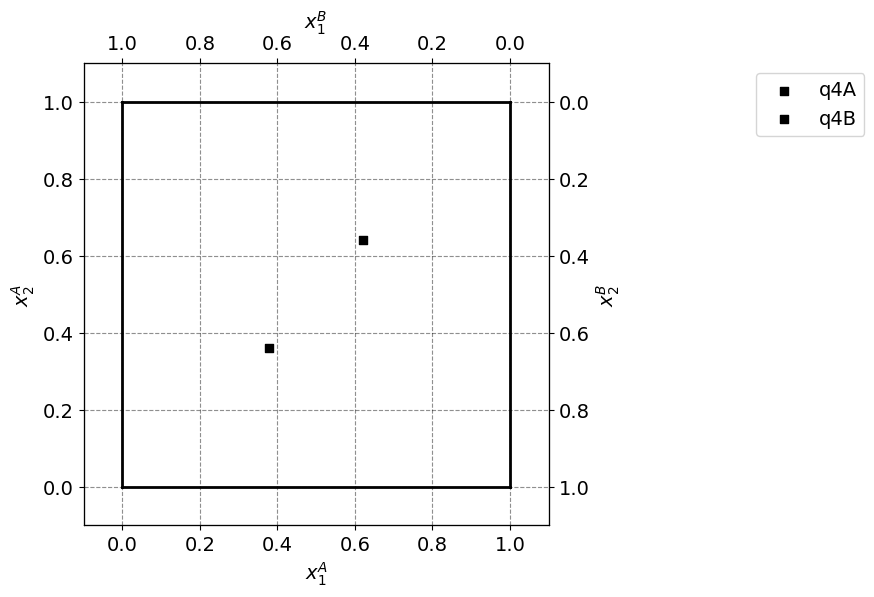

In [149]:
#We have found the following allocatins: 
#In 4a the allocations are called: 
# new_allocation_x1A, new_allocation_x2A, x1B_given_optimal_p1, x2B_given_optimal_p1

#In 4b the allocations are called: (mangler at definere x1A og x2A)
# 1-x1B_optimal, 1-x2B_optimal, x1B_optimal, x2B_optimal

#In 5a the allocations are called:
# best_x1A, best_x2A, 1-best_x1A and 1-best_x2A

#In 5b:
# x1A_optimal, x2A_optimal, 1-x1A_optimal, 1-x2A_optimal

#In 6a:
# x1A_optimal_q6, x2A_optimal_q6, 1-x1A_optimal_q6, 1-x2A_optimal_q6


# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A 
ax_A.scatter(new_allocation_x1A,new_allocation_x2A,marker='s',color='black',label='q4A')
ax_A.scatter(1-x1B_optimal,1-x2B_optimal,marker='s',color='black',label='q4B')


# limits (Pil ikke ved nedestående, det sætter bare boksbegrænsningerne op. Det er kun under #A vi skal tilføje alle punkterne)
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.7,1.0));


## 11. <a id='toc11_'></a>[Question 7: Draw a set W with 50 elements](#toc11_)

## 12. <a id='toc12_'></a>[Question 8: Find the market equilibrium allocation for each w^A belonging to C and plot them in the Edgeworth box](#toc12_)